Ejercicio 1

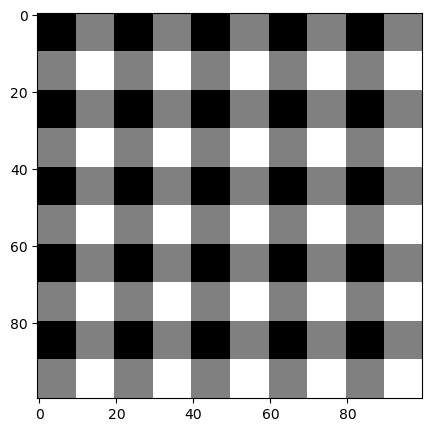

In [23]:
import numpy as np
import matplotlib.pyplot as plt

tamaño_casilla = 10
filas = 10
columnas = 10
tamaño_img = (filas * tamaño_casilla, columnas * tamaño_casilla)

tablero = np.zeros(tamaño_img, dtype=np.uint8)

for i in range(filas):
    for j in range(columnas):
        if i % 2 == 0:
            if j % 2 == 0:
                tablero[i*tamaño_casilla:(i+1)*tamaño_casilla, j*tamaño_casilla:(j+1)*tamaño_casilla] = 0
            else:
                tablero[i*tamaño_casilla:(i+1)*tamaño_casilla, j*tamaño_casilla:(j+1)*tamaño_casilla] = 128
        else:
            if j % 2 == 0:
                tablero[i*tamaño_casilla:(i+1)*tamaño_casilla, j*tamaño_casilla:(j+1)*tamaño_casilla] = 128
            else:
                tablero[i*tamaño_casilla:(i+1)*tamaño_casilla, j*tamaño_casilla:(j+1)*tamaño_casilla] = 255

plt.imshow(tablero, cmap='gray', interpolation='nearest')
plt.show()


Ejercicio 2

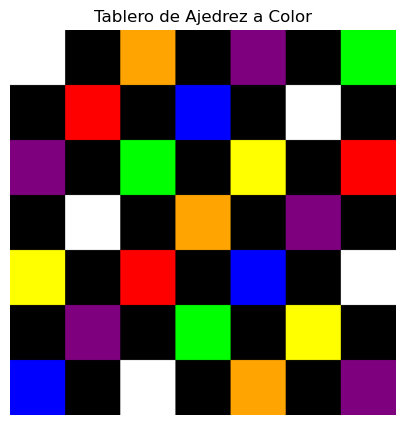

In [25]:
import numpy as np
import matplotlib.pyplot as plt

tamaño_casilla = 100
filas = 7
columnas = 7
tamaño_img = (filas * tamaño_casilla, columnas * tamaño_casilla)

colores = np.array([
    [1, 1, 1],
    [1, 1, 0],
    [1, 0.647, 0],
    [1, 0, 0],
    [0.5, 0, 0.5],
    [0, 0, 1],
    [0, 1, 0],
])

tablero = np.zeros((tamaño_img[0], tamaño_img[1], 3), dtype=np.float32)

for i in range(filas):
    for j in range(columnas):
        color_idx = (i + j) % len(colores)
        if (i + j) % 2 == 0:
            tablero[i * tamaño_casilla:(i + 1) * tamaño_casilla, j * tamaño_casilla:(j + 1) * tamaño_casilla] = colores[(color_idx + i) % len(colores)]

plt.imshow(tablero)
plt.title("Tablero de Ajedrez a Color")
plt.axis('off')
plt.show()


Ejercicio 3

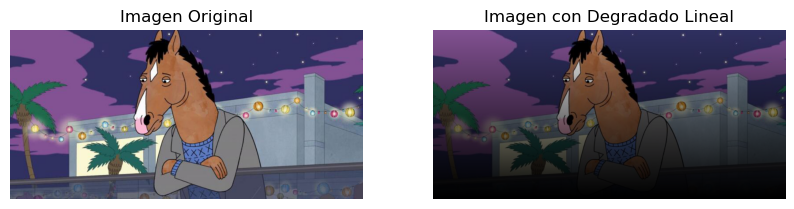

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('imagen1.jpeg')

height, width, channels = imagen.shape
mask = np.linspace(1, 0, height).reshape(height, 1)

imagen_degradada = np.zeros_like(imagen, dtype=np.uint8)

for c in range(channels):
    imagen_degradada[:, :, c] = np.uint8(imagen[:, :, c] * mask)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagen_degradada, cv2.COLOR_BGR2RGB))
plt.title("Imagen con Degradado Lineal")
plt.axis('off')

plt.show()


Ejercicio 4

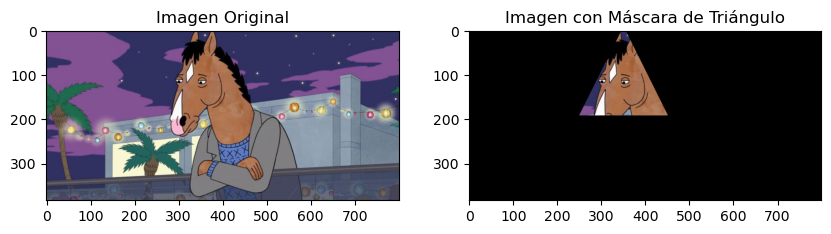

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('imagen1.jpeg')
alto, ancho = img.shape[:2]
mascara = np.zeros_like(img)

desplazamiento_y = 100
desplazamiento_x = 50

puntos = np.array([
    (ancho // 2 - desplazamiento_x, alto // 2 - 100 - desplazamiento_y),
    (ancho // 2 + 100 - desplazamiento_x, alto // 2 + 100 - desplazamiento_y),
    (ancho // 2 - 100 - desplazamiento_x, alto // 2 + 100 - desplazamiento_y)
], np.int32)

cv2.fillPoly(mascara, [puntos], (255, 255, 255))  #Creacion de la mascara 
img_mascara = cv2.bitwise_and(img, mascara)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
plt.title("Imagen Original")
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_mascara, cv2.COLOR_BGR2RGB))  
plt.title("Imagen con Máscara de Triángulo")
plt.show()


Ejercicio 5

Tomando en cuenta la imagen1.jpeg elige un punto de interes al azar (funcion randomica), genera su histograma por canales, solariza y posteriza la imagen, realiza un tratamiento de umbralizacion(el de preferencia), mezcla tecnicas y obtiene un filtro artistico, lista todas las imagenes con sus correspondientes titulos , guarda todas las imagenes resultantes con sus nombres 

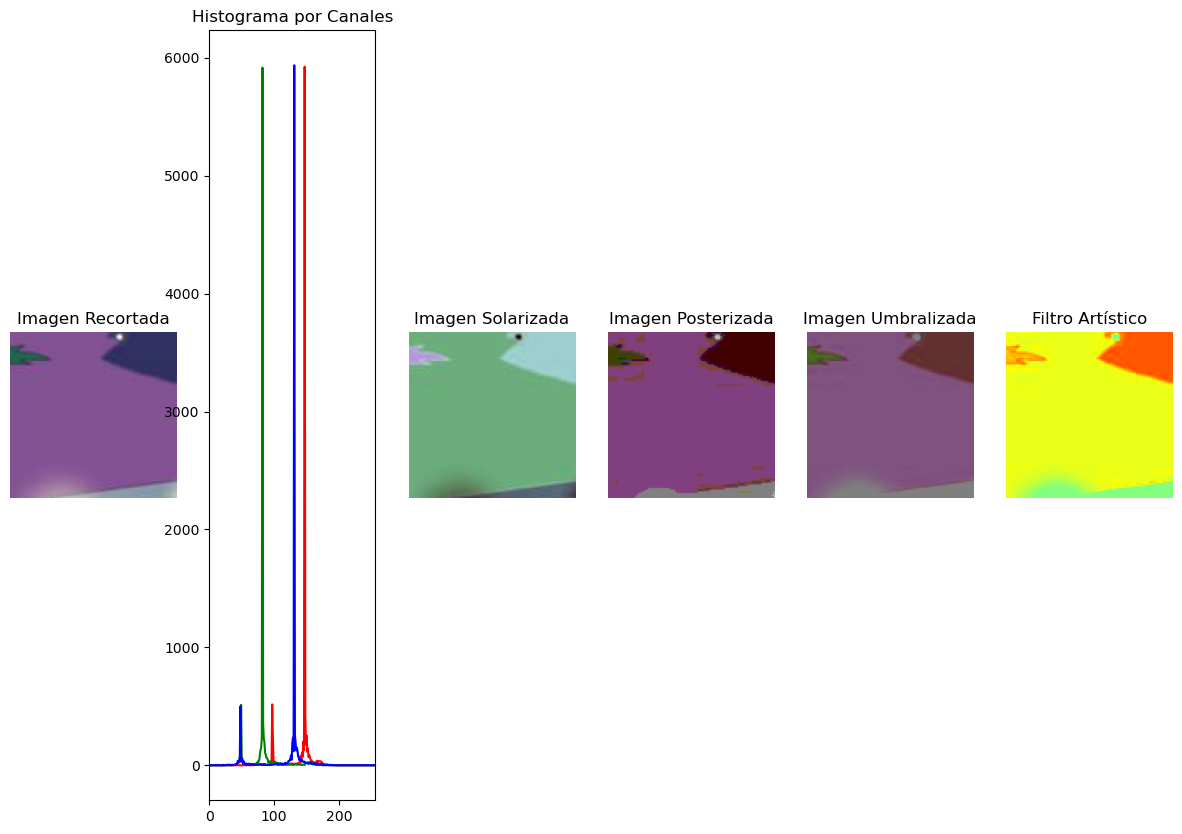

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

plt.rcParams['figure.figsize'] = [15, 10]
imagen = cv2.imread('imagen1.jpeg')
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

height, width, _ = imagen.shape
punto_interes = (random.randint(0, width-100), random.randint(0, height-100))

recorte = imagen[punto_interes[1]:punto_interes[1]+100, punto_interes[0]:punto_interes[0]+100]

color = ('r', 'g', 'b')

plt.subplot(1, 6, 1)
plt.imshow(cv2.cvtColor(recorte, cv2.COLOR_BGR2RGB))
plt.title('Imagen Recortada')
plt.axis('off')

for canal, col in enumerate(color):
    histograma = cv2.calcHist([recorte], [canal], None, [256], [0, 256])
    plt.subplot(1, 6, 2)
    plt.plot(histograma, color=col)
    plt.xlim([0, 256])
plt.title('Histograma por Canales')

solarizada = cv2.bitwise_not(recorte)
cv2.imwrite('solarizada.jpeg', solarizada)
plt.subplot(1, 6, 3)
plt.imshow(solarizada)
plt.title('Imagen Solarizada')
plt.axis('off')

niveles = 4
posterizada = (recorte // (256 // niveles)) * (256 // niveles)
cv2.imwrite('posterizada.jpeg', posterizada)
plt.subplot(1, 6, 4)
plt.imshow(posterizada)
plt.title('Imagen Posterizada')
plt.axis('off')

_, umbr_trunc = cv2.threshold(recorte, 127, 200, cv2.THRESH_TRUNC)
cv2.imwrite('umbral_trunc.jpeg', umbr_trunc)
plt.subplot(1, 6, 5)
plt.imshow(umbr_trunc, cmap='gray')
plt.title('Imagen Umbralizada')
plt.axis('off')

color_map = cv2.applyColorMap(umbr_trunc, cv2.COLORMAP_JET)
cv2.imwrite('filtro_artistico.jpeg', color_map)
plt.subplot(1, 6, 6)
plt.imshow(color_map)
plt.title('Filtro Artístico')
plt.axis('off')

plt.show()


Preguntas teoricas
A que nos referimos si hablamos de una imagen digital?

Que es la profundidad del color?

Cual es la diferencia entre CMKKY y RGB ?
